In [85]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [86]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [87]:
cat_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Categories"]])

In [88]:
#generate table of categories

a = cat_price.head(1)
json_table = []
cat_price_json = cat_price.to_json(orient='records')
cat_price_json = json.loads(cat_price_json)

for j in cat_price_json:
    test = {}
    cats = j["Categories"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = True
    

    json_table.append(test)

print(len(json_table))

18174


In [89]:
cat_price_table = pd.DataFrame(json_table)
print(cat_price_table.shape)
print(cat_price_table.columns.tolist())
cat_price_table.fillna(value=False, inplace=True)

cat_price_table.head()

(18174, 41)
['AppID', 'Name', 'Price', 'Single-player', 'Multi-player', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Achievements', 'Full controller support', 'Steam Trading Cards', 'Partial Controller Support', 'Steam Cloud', 'Remote Play on Tablet', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Steam Leaderboards', 'Remote Play on Phone', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'Remote Play on TV', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Commentary available', 'Includes Source SDK', 'Mods (require HL2)', 'Mods', 'Tracked Controller Support', 'VR Only']


,AppID,Name,Price,Single-player,Multi-player,MMO,PvP,Online PvP,Co-op,Online Co-op,...,Steam Turn Notifications,VR Support,SteamVR Collectibles,Valve Anti-Cheat enabled,Commentary available,Includes Source SDK,Mods (require HL2),Mods,Tracked Controller Support,VR Only
0,1469160,Wartune Reborn,0.00,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1178150,MazM: Jekyll and Hyde,14.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,320150,Deadlings: Rotten Edition,3.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1026420,WARSAW,23.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,485000,Cthulhu Realms,0.00,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


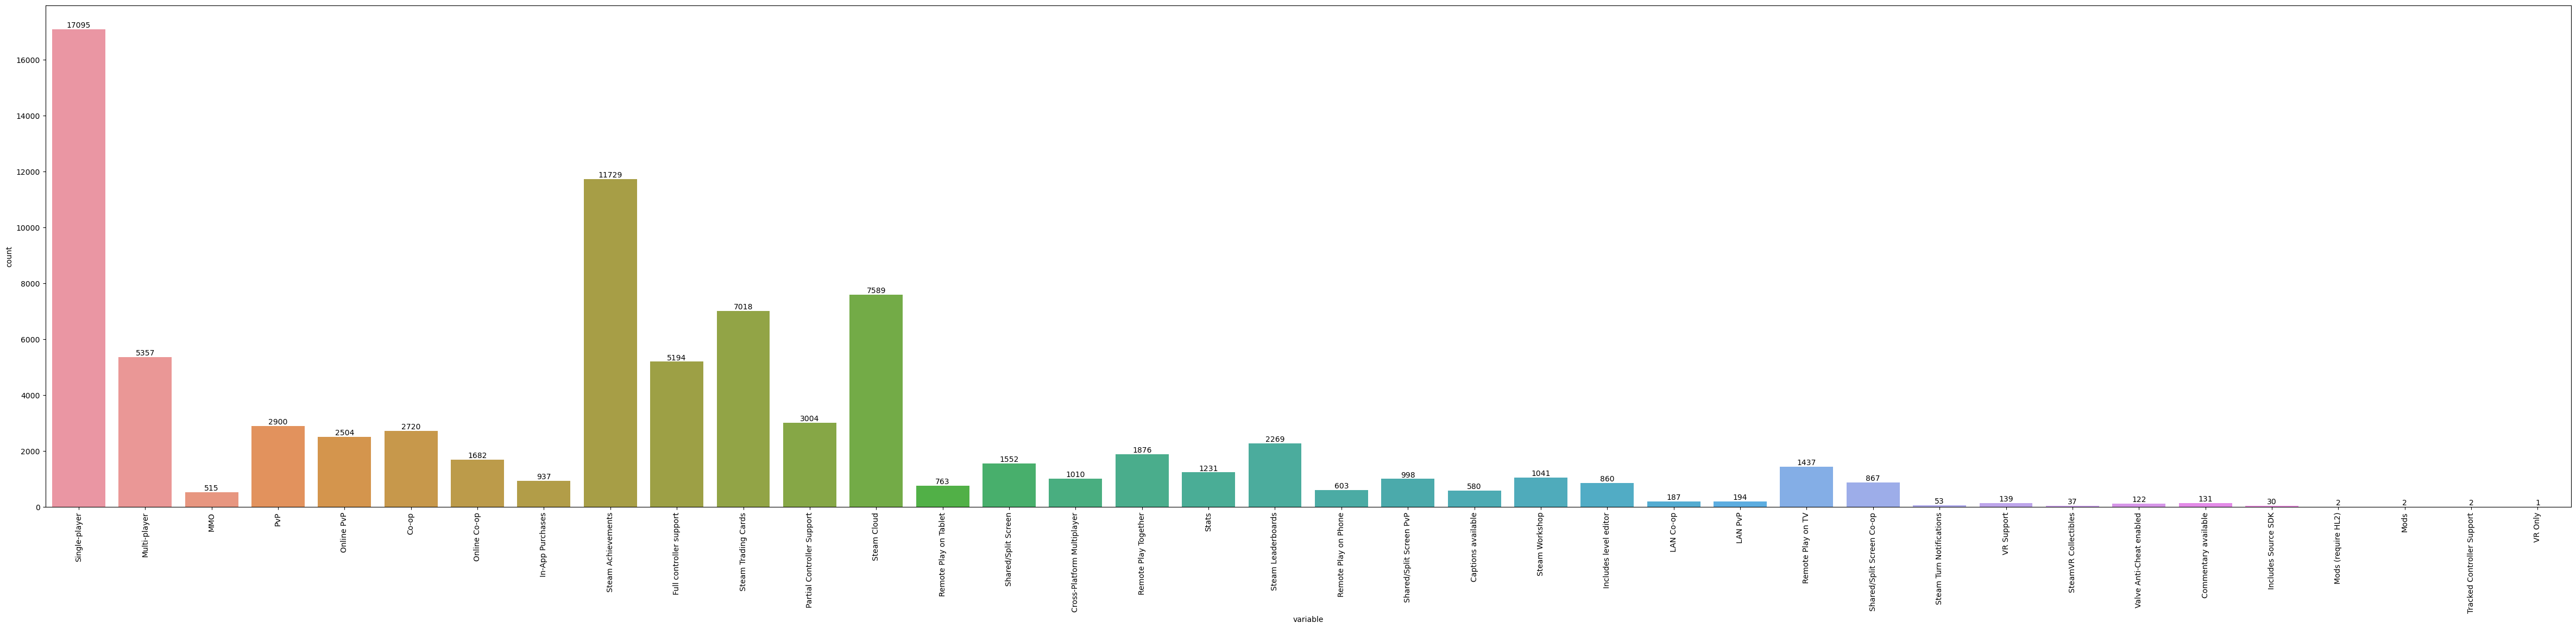

In [90]:
cat_table = cat_price_table.drop(columns =['Price', 'AppID', "Name"])

cat2 = cat_table.melt(value_vars=cat_table.columns)
cat2 = cat2[cat2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=cat2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


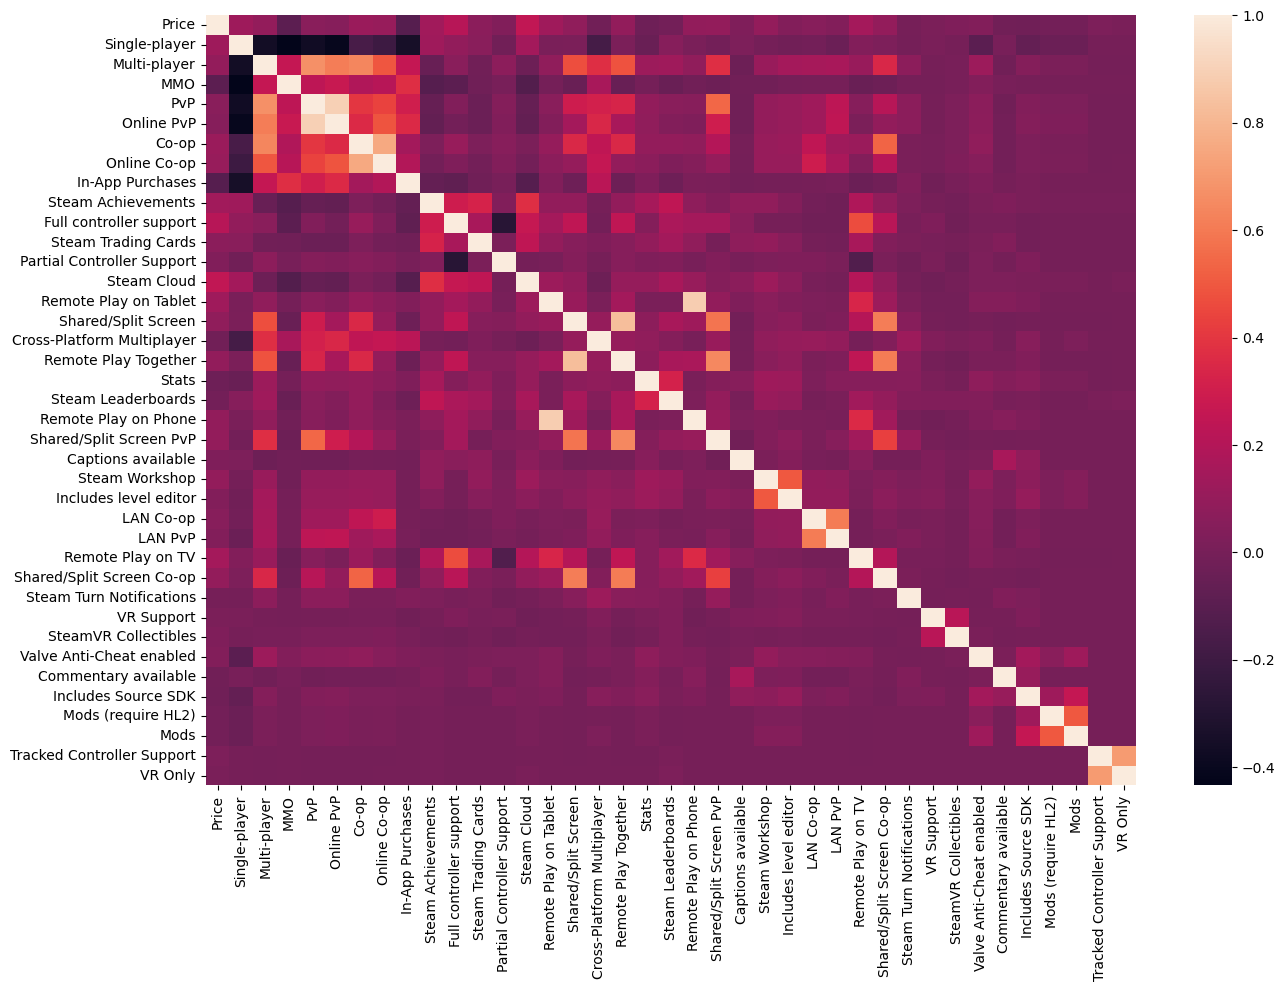

In [91]:
cat_price = cat_price_table.drop(columns =['AppID'])

plt.figure(figsize=(15,10))
sb.heatmap(data=cat_price.corr())
plt.show()

In [100]:
corr_table = cat_price.corr()["Price"]
corr_table.head()

Price            1.000000
Single-player    0.126641
Multi-player     0.094754
MMO             -0.091986
PvP              0.063570
Name: Price, dtype: float64

In [101]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Single-player  aa  0.1266411046785
Co-op  aa  0.1174025179126362
Online Co-op  aa  0.10505469180914331
In-App Purchases  aa  -0.11145126504647741
Steam Achievements  aa  0.14011803119746427
Full controller support  aa  0.2117708262705791
Steam Cloud  aa  0.2462423757464811
Remote Play on Tablet  aa  0.13454426347979867
Remote Play on TV  aa  0.15155582532535158


In [92]:
cat_table_melted = pd.melt(cat_price_table, id_vars=['Price'], value_vars=cat_table.columns)
cat_table_melted.describe()

,Price
count,690612.000000
mean,10.751710
std,11.213581
min,0.000000
25%,1.990000
50%,7.990000
75%,14.990000
max,89.990000


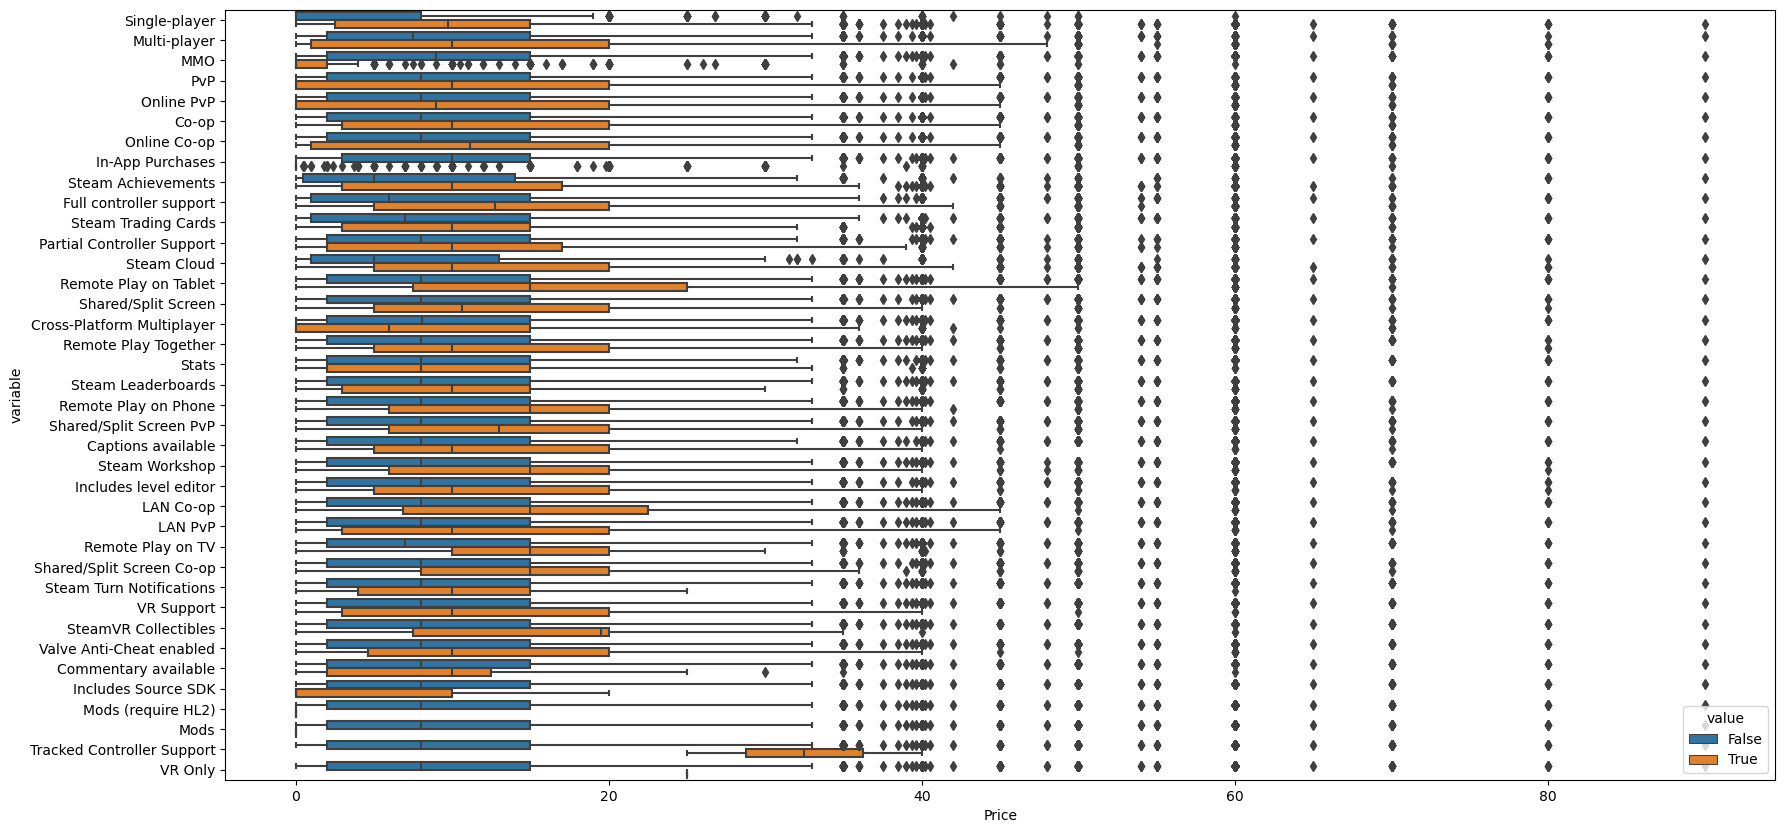

In [93]:
plt.figure(figsize=(20,10))
sb.boxplot(x=cat_table_melted["Price"], y=cat_table_melted["variable"], hue=cat_table_melted["value"], orient="h")
plt.show()

In [94]:
T_table = cat_table_melted.drop(cat_table_melted[cat_table_melted.value == False].index)
T_table.describe()

,Price
count,84231.000000
mean,12.414413
std,12.240949
min,0.000000
25%,2.990000
50%,9.990000
75%,19.990000
max,89.990000


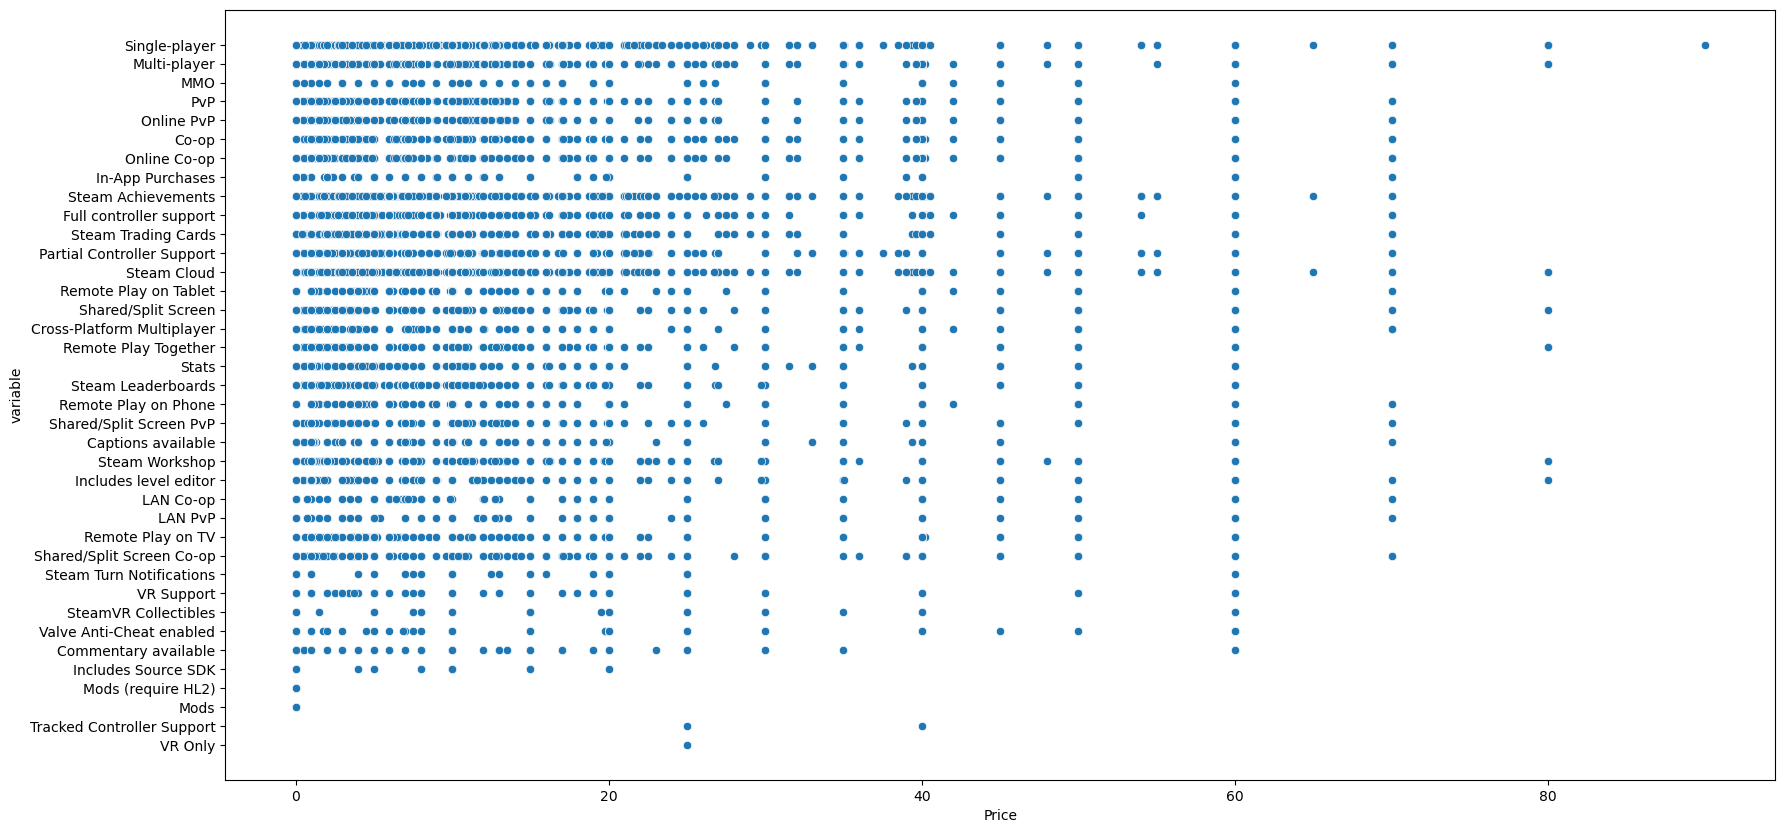

In [95]:
plt.figure(figsize=(20,10))
sb.scatterplot(data=T_table, x="Price", y='variable')
plt.show()

Looking at in app purchases

In [96]:
in_app_purchases = cat_table_melted.drop(cat_table_melted[cat_table_melted.variable != "In-App Purchases"].index)
in_app_purchases.describe()

,Price
count,18174.000000
mean,10.751710
std,11.213882
min,0.000000
25%,1.990000
50%,7.990000
75%,14.990000
max,89.990000


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

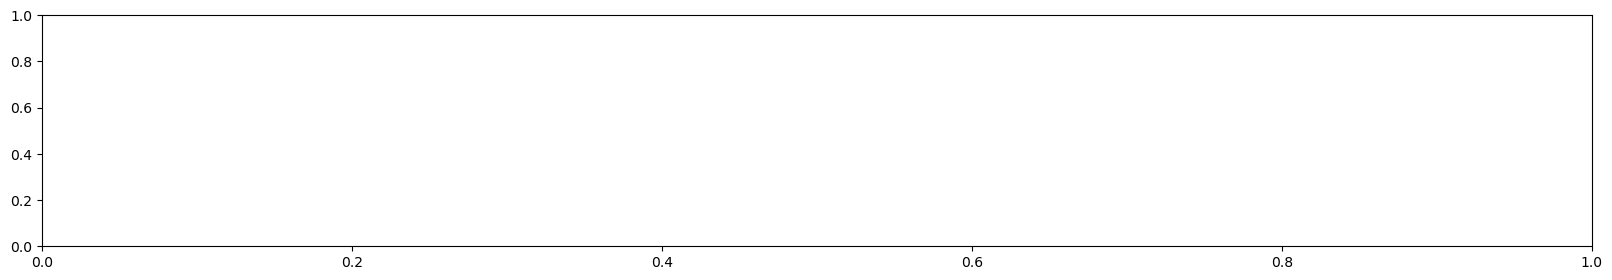

In [97]:
plt.figure(figsize=(20,3))
sb.boxplot(data=in_app_purchases, x="Price", y="value")
plt.show()

In [ ]:
in_app_purchases.corr()

,Price,value
Price,1.000000,-0.111451
value,-0.111451,1.000000
